In [2]:
import os
import json
import glob

#Работу выполнила:
#Студентка 4 курса бакалавриата ЧОУ МУИВ
#группы ИСс 23.1/Б3-22
#Родникова Галина Антоновна 

def extract_semantics_from_jsonl():


    # извлекает все записи с field=semantics или field=syntax_semantics из всех jsonl файлов
    
    # результаты
    semantics_entries = []
    
    # ищет все jsonl файлы рекурсивно
    jsonl_files = glob.glob('./blimp-master/data**/*.jsonl', recursive=True)
    
    if not jsonl_files:
        print("не найдено .jsonl файлов")
        return
    
    print(f"найдено {len(jsonl_files)} файлов .jsonl")
    
    # обработка каждый файл
    for file_path in jsonl_files:
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                for line_num, line in enumerate(f, 1):
                    line = line.strip()
                    if not line:  # пропуск пустых строк
                        continue
                    
                    try:
                        data = json.loads(line)
                        
                        # проверка поля field
                        if 'field' in data:
                            field_value = data['field']
                            if field_value in ['semantics', 'syntax_semantics']:
                                semantics_entries.append(data)
                    
                    except json.JSONDecodeError as e:
                        print(f"ошибка в файле {file_path}, строка {line_num}: {e}")
                        continue
        
        except Exception as e:
            print(f"ошибка при чтении файла {file_path}: {e}")
    
    # результаты
    if semantics_entries:
        output_file = 'all_semantics_entries.jsonl'
        with open(output_file, 'w', encoding='utf-8') as f:
            for entry in semantics_entries:
                f.write(json.dumps(entry, ensure_ascii=False) + '\n')
        
        print(f"сохранено {len(semantics_entries)} записей в файл: {output_file}")
        
        # статистика
        semantics_count = sum(1 for e in semantics_entries if e.get('field') == 'semantics')
        syntax_semantics_count = sum(1 for e in semantics_entries if e.get('field') == 'syntax_semantics')
        
        print(f"статистика:")
        print(f"semantics: {semantics_count} записей")
        print(f"syntax-semantics: {syntax_semantics_count} записей")
        
        # примеры
        if semantics_entries:
            print(f"\n примеры первых 3 записей:")
            for i, entry in enumerate(semantics_entries[:3], 1):
                print(f"\n{i}. UID: {entry.get('UID', 'N/A')}")
                print(f"field: {entry.get('field', 'N/A')}")
                print(f"good: {entry.get('sentence_good', 'N/A')[:50]}...")
                print(f"bad:  {entry.get('sentence_bad', 'N/A')[:50]}...")
    else:
        print("не найдено записей с field=semantics или field=syntax-semantics")

# запуск
if __name__ == "__main__":
    extract_semantics_from_jsonl()

найдено 67 файлов .jsonl
сохранено 22000 записей в файл: all_semantics_entries.jsonl
статистика:
semantics: 9000 записей
syntax-semantics: 13000 записей

 примеры первых 3 записей:

1. UID: superlative_quantifiers_2
field: semantics
good: The teenager does tour at most nine restaurants....
bad:  No teenager does tour at most nine restaurants....

2. UID: superlative_quantifiers_2
field: semantics
good: That car looks like at least seven prints....
bad:  No car looks like at least seven prints....

3. UID: superlative_quantifiers_2
field: semantics
good: The doctor brought at most eight gates....
bad:  No doctor brought at most eight gates....


основная информация
всего записей: 22000
количество столбцов: 17

структура данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   sentence_good           22000 non-null  object
 1   sentence_bad            22000 non-null  object
 2   crucial_item            2000 non-null   object
 3   two_prefix_prefix_good  9000 non-null   object
 4   two_prefix_prefix_bad   9000 non-null   object
 5   two_prefix_word         9000 non-null   object
 6   field                   22000 non-null  object
 7   linguistics_term        22000 non-null  object
 8   UID                     22000 non-null  object
 9   simple_LM_method        22000 non-null  bool  
 10  one_prefix_method       22000 non-null  bool  
 11  two_prefix_method       22000 non-null  bool  
 12  lexically_identical     22000 non-null  bool  
 13  pairID                

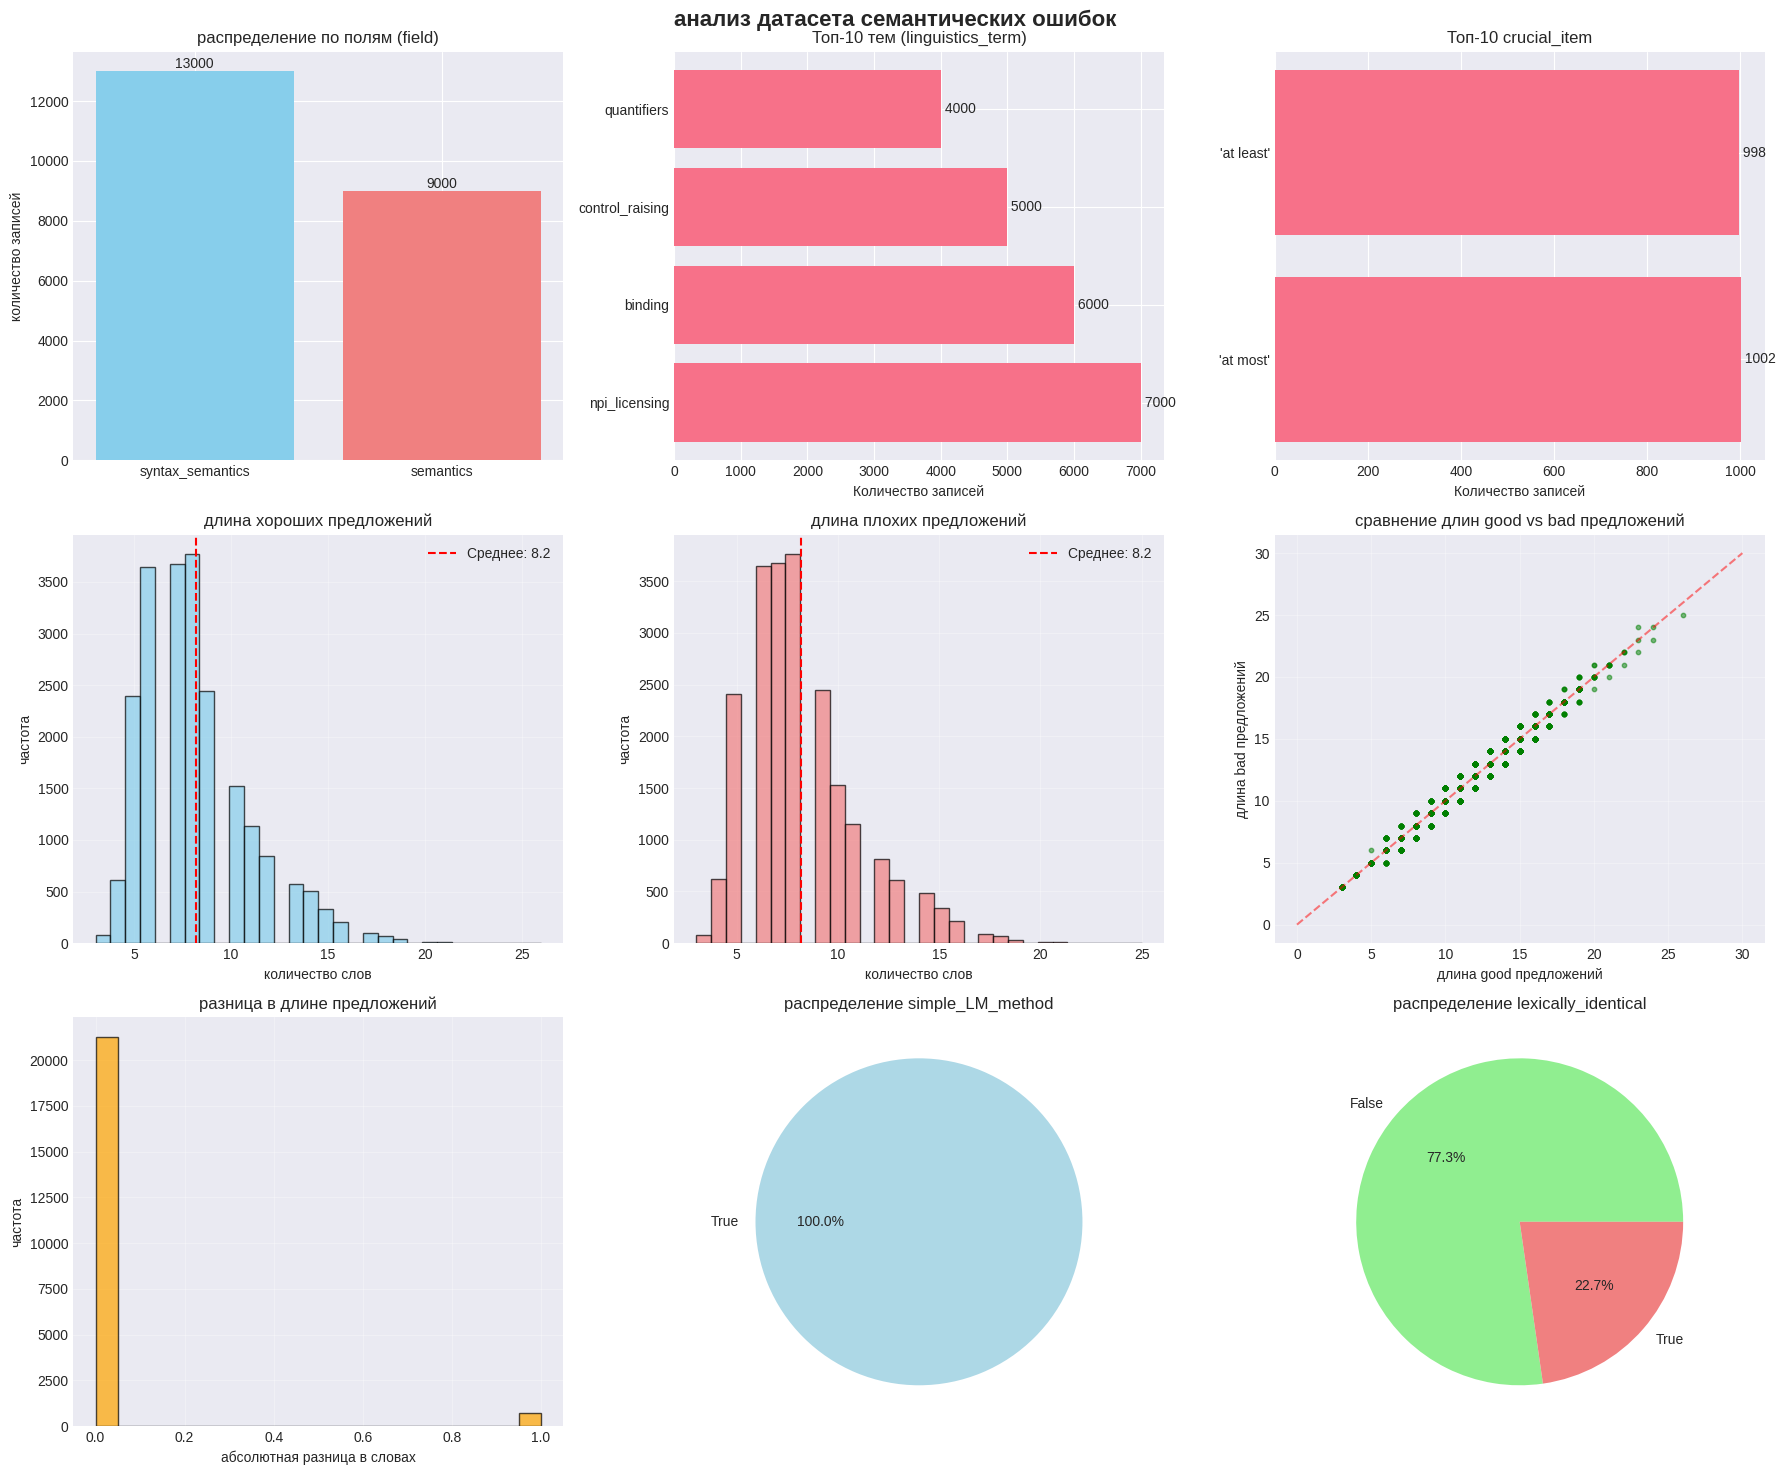


 
детальный анализ предложений
 

примеры пар предложений для разных linguistics_term:

тема: npi_licensing

 пример 0:
good: The associations that had worried Cynthia have not ever planned to shock every actress.
bad: The associations that had not worried Cynthia have ever planned to shock every actress.
crucial item: 'nan'
UID: sentential_negation_npi_scope

 пример 1:
good: Every son of Jerry who has insulted Jerry can not ever die.
bad: Every son of Jerry who has not insulted Jerry can ever die.
crucial item: 'nan'
UID: sentential_negation_npi_scope

тема: binding

 пример 0:
good: The teenagers explain that they aren't breaking all glasses.
bad: The teenagers explain that themselves aren't breaking all glasses.
crucial item: 'nan'
UID: principle_A_case_1

 пример 1:
good: Carl can't imagine that he complained about Lisa.
bad: Carl can't imagine that himself complained about Lisa.
crucial item: 'nan'
UID: principle_A_case_1

тема: control_raising

 пример 0:
good: There is soon to

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import numpy as np

# стиль для графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# загрузка данных
def load_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.strip()))
    return pd.DataFrame(data)

df = load_data('all_semantics_entries.jsonl')

print("основная информация")
print(f"всего записей: {len(df)}")
print(f"количество столбцов: {len(df.columns)}")
print(f"\nструктура данных:")
print(df.info())
print(f"\nпервые 5 записей:")
print(df.head())

print("\n" + " ")
print("статистика по полям")
print(" ")

# анализ распределения по полям
field_distribution = df['field'].value_counts()
print("\n1. распределение по полям:")
for field, count in field_distribution.items():
    print(f"{field}: {count} записей ({count/len(df)*100:.1f}%)")

# анализ уникальных значений в ключевых столбцах
print("\n2. уникальные значения:")
print(f"   уникальных UID: {df['UID'].nunique()}")
print(f"   уникальных linguistics_term: {df['linguistics_term'].nunique()}")
print(f"   уникальных crucial_item: {df['crucial_item'].nunique()}")

# статистика по булевым полям
print("\n3. булевые поля:")
bool_columns = ['simple_LM_method', 'one_prefix_method', 'two_prefix_method', 'lexically_identical']
for col in bool_columns:
    if col in df.columns:
        # преобразование в булевый тип на случай, если это строки
        if df[col].dtype == 'object':
            bool_series = df[col].apply(lambda x: str(x).lower() in ['true', '1', 'yes', 't'])
        else:
            bool_series = df[col]
        
        true_count = bool_series.sum()
        false_count = len(df) - true_count
        print(f"{col}: True={true_count} ({true_count/len(df)*100:.1f}%), "
              f"false={false_count} ({false_count/len(df)*100:.1f}%)")

print("\n" + " ")
print("анализ тематик (linguistics_term)")
print(" ")

# анализ linguistics_term
linguistics_counts = df['linguistics_term'].value_counts()
print(f"\n топ-10 тем по linguistics_term:")
for term, count in linguistics_counts.head(10).items():
    print(f"{term}: {count} записей ({count/len(df)*100:.1f}%)")

# анализ распределения UID по темам
print(f"\nраспределение UID по темам:")
uid_by_term = df.groupby('linguistics_term')['UID'].nunique().sort_values(ascending=False)
for term, uid_count in uid_by_term.head(10).items():
    total_records = linguistics_counts[term]
    print(f"{term}: {uid_count} UID, {total_records} записей "
          f"(в среднем {total_records/uid_count:.1f} записей на UID)")

print("\n" + " ")
print("анализ crucial_item")
print(" ")

# анализ crucial_item
crucial_counts = df['crucial_item'].value_counts()
print(f"\n топ-10 crucial_item:")
for item, count in crucial_counts.head(10).items():
    print(f"'{item}': {count} записей ({count/len(df)*100:.1f}%)")

# анализ длины предложений
print("\n" + " ")
print("анализ длины проедложений")
print(" ")

df['good_sentence_length'] = df['sentence_good'].apply(lambda x: len(x.split()))
df['bad_sentence_length'] = df['sentence_bad'].apply(lambda x: len(x.split()))
df['length_diff'] = abs(df['good_sentence_length'] - df['bad_sentence_length'])

print(f"\n статистика длины предложений:")
print(f"good sentences: средняя длина = {df['good_sentence_length'].mean():.1f} слов, "
      f"std = {df['good_sentence_length'].std():.1f}")
print(f"bad sentences: средняя длина = {df['bad_sentence_length'].mean():.1f} слов, "
      f"std = {df['bad_sentence_length'].std():.1f}")
print(f"максимальная разница в длине: {df['length_diff'].max()} слов")
print(f"записи с одинаковой длиной: {(df['length_diff'] == 0).sum()} "
      f"({(df['length_diff'] == 0).sum()/len(df)*100:.1f}%)")

# графики
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('анализ датасета семантических ошибок', fontsize=16, fontweight='bold')

# распределение по полям
axes[0, 0].bar(field_distribution.index, field_distribution.values, color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('распределение по полям (field)')
axes[0, 0].set_ylabel('количество записей')
for i, v in enumerate(field_distribution.values):
    axes[0, 0].text(i, v, str(v), ha='center', va='bottom')

#  топ-10 linguistics_term
top_terms = linguistics_counts.head(10)
bars = axes[0, 1].barh(range(len(top_terms)), top_terms.values)
axes[0, 1].set_yticks(range(len(top_terms)))
axes[0, 1].set_yticklabels(top_terms.index)
axes[0, 1].set_title('Топ-10 тем (linguistics_term)')
axes[0, 1].set_xlabel('Количество записей')
for i, v in enumerate(top_terms.values):
    axes[0, 1].text(v, i, f' {v}', va='center')

# топ-10 crucial_item
top_items = crucial_counts.head(10)
bars = axes[0, 2].barh(range(len(top_items)), top_items.values)
axes[0, 2].set_yticks(range(len(top_items)))
axes[0, 2].set_yticklabels([f"'{x}'" for x in top_items.index])
axes[0, 2].set_title('Топ-10 crucial_item')
axes[0, 2].set_xlabel('Количество записей')
for i, v in enumerate(top_items.values):
    axes[0, 2].text(v, i, f' {v}', va='center')

# распределение длины хороших предложений
axes[1, 0].hist(df['good_sentence_length'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].axvline(df['good_sentence_length'].mean(), color='red', linestyle='--', 
                   label=f'Среднее: {df["good_sentence_length"].mean():.1f}')
axes[1, 0].set_title('длина хороших предложений')
axes[1, 0].set_xlabel('количество слов')
axes[1, 0].set_ylabel('частота')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# распределение длины плохих предложений
axes[1, 1].hist(df['bad_sentence_length'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1, 1].axvline(df['bad_sentence_length'].mean(), color='red', linestyle='--', 
                   label=f'Среднее: {df["bad_sentence_length"].mean():.1f}')
axes[1, 1].set_title('длина плохих предложений')
axes[1, 1].set_xlabel('количество слов')
axes[1, 1].set_ylabel('частота')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# сравнение длин предложений
axes[1, 2].scatter(df['good_sentence_length'], df['bad_sentence_length'], 
                   alpha=0.5, s=10, color='green')
axes[1, 2].plot([0, 30], [0, 30], 'r--', alpha=0.5)  # Линия y=x
axes[1, 2].set_title('сравнение длин good vs bad предложений')
axes[1, 2].set_xlabel('длина good предложений')
axes[1, 2].set_ylabel('длина bad предложений')
axes[1, 2].grid(True, alpha=0.3)

# распределение разницы в длине
axes[2, 0].hist(df['length_diff'], bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[2, 0].set_title('разница в длине предложений')
axes[2, 0].set_xlabel('абсолютная разница в словах')
axes[2, 0].set_ylabel('частота')
axes[2, 0].grid(True, alpha=0.3)

# распределение по булевым полям (simple_LM_method)
if 'simple_LM_method' in df.columns:
    
    if df['simple_LM_method'].dtype == 'object':
        lm_series = df['simple_LM_method'].apply(lambda x: str(x).lower() in ['true', '1', 'yes', 't'])
    else:
        lm_series = df['simple_LM_method']
    
    lm_counts = lm_series.value_counts()
    print(f"\nDEBUG: simple_LM_method value counts: {lm_counts}")
    
    if len(lm_counts) > 0:
        # данные для круговой диаграммы
        labels = [str(label) for label in lm_counts.index]
        sizes = lm_counts.values
        colors = ['lightgreen', 'lightcoral'] if len(lm_counts) == 2 else ['lightblue']
        
        axes[2, 1].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors[:len(labels)])
        axes[2, 1].set_title('распределение simple_LM_method')
    else:
        axes[2, 1].text(0.5, 0.5, 'нет данных', ha='center', va='center')
        axes[2, 1].set_title('распределение simple_LM_method')
        axes[2, 1].set_xticks([])
        axes[2, 1].set_yticks([])

# распределение по булевым полям (lexically_identical)
if 'lexically_identical' in df.columns:
    # преобразуем к булевому типу для корректного подсчета
    if df['lexically_identical'].dtype == 'object':
        lex_series = df['lexically_identical'].apply(lambda x: str(x).lower() in ['true', '1', 'yes', 't'])
    else:
        lex_series = df['lexically_identical']
    
    lex_counts = lex_series.value_counts()
    print(f"DEBUG: lexically_identical value counts: {lex_counts}")
    
    if len(lex_counts) > 0:
        # данные для круговой диаграммы
        labels = [str(label) for label in lex_counts.index]
        sizes = lex_counts.values
        colors = ['lightgreen', 'lightcoral'] if len(lex_counts) == 2 else ['lightblue']
        
        axes[2, 2].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors[:len(labels)])
        axes[2, 2].set_title('распределение lexically_identical')
    else:
        axes[2, 2].text(0.5, 0.5, 'нет данных', ha='center', va='center')
        axes[2, 2].set_title('распределение lexically_identical')
        axes[2, 2].set_xticks([])
        axes[2, 2].set_yticks([])

plt.tight_layout()
plt.show()

print("\n" + " ")
print("детальный анализ предложений")
print(" ")

# анализ примеров предложений
print("\nпримеры пар предложений для разных linguistics_term:")
sample_terms = linguistics_counts.head(3).index

for term in sample_terms:
    term_df = df[df['linguistics_term'] == term].head(2)
    print(f"\nтема: {term}")
    for idx, row in term_df.iterrows():
        print(f"\n пример {row['pairID']}:")
        print(f"good: {row['sentence_good']}")
        print(f"bad: {row['sentence_bad']}")
        print(f"crucial item: '{row['crucial_item']}'")
        print(f"UID: {row['UID']}")

print("\n" + " ")
print("корелляционный анализ")
print("=" * 80)

# числовые представления для анализа
df_numeric = df.copy()

# категориальные признаки
if 'field' in df.columns:
    df_numeric['field_numeric'] = df_numeric['field'].map({'semantics': 0, 'syntax-semantics': 1})

# вычисление корреляции
numeric_columns = ['good_sentence_length', 'bad_sentence_length', 'length_diff']
if 'field_numeric' in df_numeric.columns:
    numeric_columns.append('field_numeric')

correlation_matrix = df_numeric[numeric_columns].corr()

print("\nматрица корреляций:")
print(correlation_matrix)

print("\n" + " ")
print("анализ распредения по UID")
print("=" )

uid_counts = df['UID'].value_counts()
print(f"\nстатистика по UID:")
print(f"всего уникальных UID: {len(uid_counts)}")
print(f"среднее записей на UID: {uid_counts.mean():.1f}")
print(f"медиана записей на UID: {uid_counts.median():.1f}")
print(f"стандартное отклонение: {uid_counts.std():.1f}")
print(f"минимальное количество: {uid_counts.min()}")
print(f"максимальное количество: {uid_counts.max()}")

print(f"\n топ-5 самых частых UID:")
for uid, count in uid_counts.head(5).items():
    print(f"{uid}: {count} записей")

print(f"\n топ-5 самых редких UID:")
for uid, count in uid_counts.tail(5).items():
    print(f"{uid}: {count} записей")

# анализ паттернов в предложениях
print("\n" + " ")
print("анализ патернов")
print(" ")

# наиболее частые префиксы
print("\nанализ префиксов (первые 3 слова):")
df['good_prefix'] = df['sentence_good'].apply(lambda x: ' '.join(x.split()[:3]))
df['bad_prefix'] = df['sentence_bad'].apply(lambda x: ' '.join(x.split()[:3]))

good_prefix_counts = df['good_prefix'].value_counts().head(5)
bad_prefix_counts = df['bad_prefix'].value_counts().head(5)

print("\nтоп-5 префиксов в хороших предложениях:")
for prefix, count in good_prefix_counts.items():
    print(f"   '{prefix}...': {count} записей")

print("\nтоп-5 префиксов в плохих предложениях:")
for prefix, count in bad_prefix_counts.items():
    print(f"   '{prefix}...': {count} записей")

# анализ изменений между good и bad предложениями
print("\nанализ наиболее частых изменений:")
# простой анализ: находим слова, которые отличаются
def find_differences(good_sent, bad_sent):
    good_words = set(good_sent.lower().split())
    bad_words = set(bad_sent.lower().split())
    return good_words - bad_words, bad_words - good_words

df['added_words'] = df.apply(lambda row: find_differences(row['sentence_bad'], row['sentence_good'])[0], axis=1)
df['removed_words'] = df.apply(lambda row: find_differences(row['sentence_good'], row['sentence_bad'])[0], axis=1)

# статистика по добавленным словам
all_added = []
for words in df['added_words']:
    all_added.extend(words)

added_counts = Counter(all_added).most_common(10)
print("\nТоп-10 самых часто добавляемых слов:")
for word, count in added_counts:
    print(f"'{word}': {count} раз")

# статистика по удаленным словам
all_removed = []
for words in df['removed_words']:
    all_removed.extend(words)

#removed_counts = Counter(all_removed).most_common(10)
#print("\nтоп-10 самых часто удаляемых слов:")
#for word, count in removed_counts:
    print(f"   '{word}': {count} раз")

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import json
import math
import random
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# установка seed
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)



In [ ]:
class ImprovedTokenizer:
    
    # токенизатор
    
    def __init__(self, vocab_size=20000):
        self.vocab_size = vocab_size
        self.word2idx = {}
        self.idx2word = {}
        self.special_tokens = {
            '[PAD]': 0,
            '[UNK]': 1,
            '[CLS]': 2,
            '[SEP]': 3,
            '[MASK]': 4
        }
        
    def build_vocab(self, sentences, min_freq=2):
        print("построение улучшенного словаря")
        
        word_freq = Counter()
        for sentence in tqdm(sentences, desc="анализ слов"):
            words = self._preprocess(sentence).split()
            word_freq.update(words)
        
        # фильтрация по минимальной частоте
        filtered_words = {word: freq for word, freq in word_freq.items() if freq >= min_freq}
        print(f"Слов с частотой >= {min_freq}: {len(filtered_words)}")
        
        # самые частые слова
        most_common = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)
        most_common = most_common[:self.vocab_size - len(self.special_tokens)]
        
        # словарь
        self.word2idx = self.special_tokens.copy()
        
        # добавка обычные слова
        start_idx = len(self.special_tokens)
        for i, (word, _) in enumerate(most_common):
            self.word2idx[word] = start_idx + i
        
        # обратный словарь
        self.idx2word = {idx: word for word, idx in self.word2idx.items()}
        
        print(f"Словарь построен. Размер: {len(self.word2idx)} слов")
        
    def _preprocess(self, text):
        
        #Предобработка текста
        text = text.lower().strip()
        text = ' '.join(text.split())
        return text
    
    def tokenize(self, text):
        
        # токенизация
        text = self._preprocess(text)
        words = text.split()
        return ['[CLS]'] + words + ['[SEP]']
    
    def encode(self, text, max_length=128):
        
        # кодирование в индексы
        tokens = self.tokenize(text)
        
        if len(tokens) > max_length:
            tokens = tokens[:max_length-1] + ['[SEP]']
        
        indices = []
        for token in tokens:
            if token in self.word2idx:
                indices.append(self.word2idx[token])
            else:
                indices.append(self.word2idx['[UNK]'])
        
        if len(indices) < max_length:
            pad_len = max_length - len(indices)
            indices = indices + [self.word2idx['[PAD]']] * pad_len
        
        # маска внимания
        attention_mask = [1 if idx != self.word2idx['[PAD]'] else 0 for idx in indices]
        
        return {
            'input_ids': torch.tensor(indices, dtype=torch.long),
            'attention_mask': torch.tensor(attention_mask, dtype=torch.long)
        }
    
    def get_vocab_size(self):
        return len(self.word2idx)

In [7]:
class PositionalEncoding(nn.Module):

    #позиционное кодирование в Transformer
    
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        
        self.register_buffer('pe', pe)
    
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class ImprovedTransformerEncoder(nn.Module):
    # transformer энкодер
    
    def __init__(self, vocab_size, d_model=256, nhead=8, num_layers=6, dim_feedforward=1024, dropout=0.1, max_len=512):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, max_len)
        self.dropout = nn.Dropout(dropout)
        
        # слои transformer 
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            activation='gelu',
            batch_first=True
        )
        
        self.transformer = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers
        )
        
        self.layer_norm = nn.LayerNorm(d_model)
        
        
        self._init_weights()
    
    def _init_weights(self):
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)
    
    def forward(self, src, src_mask=None):
        # embedding
        src_emb = self.embedding(src) * math.sqrt(self.embedding.embedding_dim)
        src_emb = self.pos_encoder(src_emb)
        src_emb = self.dropout(src_emb)
        
        # transformer
        output = self.transformer(src_emb, src_key_padding_mask=src_mask)
        output = self.layer_norm(output)
        
        return output

class AdvancedContrastiveModel(nn.Module):

    # модель для контрастивного обучения
    
    def __init__(self, vocab_size, d_model=256, projection_dim=128):
        super().__init__()
        
        # encoder
        self.encoder = ImprovedTransformerEncoder(
            vocab_size=vocab_size,
            d_model=d_model,
            nhead=8,
            num_layers=4,
            dim_feedforward=d_model * 4
        )
        
        # pooling
        self.pooling = nn.Sequential(
            nn.Linear(d_model, d_model * 2),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(d_model * 2, projection_dim)
        )
        
        # нормализация выходных эмбеддингов
        self.output_norm = nn.LayerNorm(projection_dim)
        
        print(f"модель создана, параметры: {sum(p.numel() for p in self.parameters()):,}")
    
    def forward(self, input_ids, attention_mask=None):
        
        # маска для padding
        if attention_mask is not None:
            key_padding_mask = (attention_mask == 0)
        else:
            key_padding_mask = None
        
        # encoder
        encoder_output = self.encoder(input_ids, key_padding_mask)
        
        # mean pooling (исключая padding)
        if key_padding_mask is not None:
            padding_mask = ~key_padding_mask.unsqueeze(-1)
            sum_embeddings = torch.sum(encoder_output * padding_mask, dim=1)
            num_tokens = padding_mask.sum(dim=1)
            pooled = sum_embeddings / torch.clamp(num_tokens, min=1e-9)
        else:
            pooled = torch.mean(encoder_output, dim=1)
        
        # projection
        projected = self.pooling(pooled)
        
        # нормализация
        normalized = F.normalize(projected, p=2, dim=1)
        
        return normalized

In [ ]:
def load_all_data(file_path='all_semantics_entries.jsonl'):

    print("Загрузка данных")
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.strip()))
    
    df = pd.DataFrame(data)
    print(f"загружено {len(df)} записей")
    
    # очистка
    df = df.dropna(subset=['sentence_good', 'sentence_bad'])

    # разделение
    train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)  # 80% train
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)  # 10% val, 10% test
    
    print(f"train: {len(train_df)} записей")
    print(f"val: {len(val_df)} записей")
    print(f"test: {len(test_df)} записей")
    
    return train_df, val_df, test_df

train_df, val_df, test_df = load_all_data()

In [8]:
class AugmentedContrastiveDataset(Dataset):
    
    #датасет с аугментацией данных
    
    def __init__(self, df, tokenizer, max_length=128, mode='train', augment=False):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.mode = mode
        self.augment = augment and mode == 'train'
        
        # все предложения для поиска похожих
        self.all_good = list(self.df['sentence_good'])
        self.all_bad = list(self.df['sentence_bad'])
        
        # группировка по UID для сложных негативов
        self.uid_to_indices = {}
        for idx, uid in enumerate(self.df['UID']):
            if uid not in self.uid_to_indices:
                self.uid_to_indices[uid] = []
            self.uid_to_indices[uid].append(idx)
        
        print(f"загружено {len(self.df)} пар в режиме {mode}")
        
        if mode == 'train':
            # строим словарь 
            all_sentences = self.all_good + self.all_bad
            tokenizer.build_vocab(all_sentences, min_freq=2)
    
    def _augment_sentence(self, sentence):
        words = sentence.lower().split()
        if len(words) <= 3:
            return sentence
        
        # случайно удаляются несущественные слова с вероятностью 20%, но не первые и последние
        if random.random() < 0.2 and len(words) > 4:
            idx = random.randint(1, len(words) - 2)
            words.pop(idx)
        
        # случайно меняеются порядок соседних слов с вероятностью 15%
        if random.random() < 0.15 and len(words) > 3:
            i = random.randint(0, len(words) - 2)
            words[i], words[i+1] = words[i+1], words[i]
        
        return ' '.join(words)
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        
        # anchor - хорошее предложение 
        anchor = row['sentence_good']
        if self.augment:
            anchor = self._augment_sentence(anchor)
        
        # positive - другое хорошее предложение ИЗ ТОЙ ЖЕ ТЕМЫ
        uid = row['UID']
        same_uid_indices = self.uid_to_indices.get(uid, [idx])
        
        positive_idx = random.choice(same_uid_indices)
        while positive_idx == idx and len(same_uid_indices) > 1:
            positive_idx = random.choice(same_uid_indices)
        
        positive = self.df.iloc[positive_idx]['sentence_good']
        if self.augment:
            positive = self._augment_sentence(positive)
        
        # negative - плохое предложение из той же пары
        negative = row['sentence_bad']
        
        # hard negative: плохое предложение из ДРУГОЙ темы
        if random.random() < 0.3: 
            other_uids = [u for u in self.uid_to_indices.keys() if u != uid]
            if other_uids:
                hard_uid = random.choice(other_uids)
                hard_idx = random.choice(self.uid_to_indices[hard_uid])
                negative = self.df.iloc[hard_idx]['sentence_bad']
        
        # токенизация
        anchor_enc = self.tokenizer.encode(anchor, self.max_length)
        positive_enc = self.tokenizer.encode(positive, self.max_length)
        negative_enc = self.tokenizer.encode(negative, self.max_length)
        
        return {
            'anchor_ids': anchor_enc['input_ids'],
            'anchor_mask': anchor_enc['attention_mask'],
            'positive_ids': positive_enc['input_ids'],
            'positive_mask': positive_enc['attention_mask'],
            'negative_ids': negative_enc['input_ids'],
            'negative_mask': negative_enc['attention_mask'],
            'linguistics_term': row['linguistics_term'],
            'uid': uid
        }

print("\nсоздание улучшенного токенизатора и датасетов")
tokenizer = ImprovedTokenizer(vocab_size=15000)

train_dataset = AugmentedContrastiveDataset(
    train_df, tokenizer, max_length=64, mode='train', augment=True
)
val_dataset = AugmentedContrastiveDataset(
    val_df, tokenizer, max_length=64, mode='val', augment=False
)
test_dataset = AugmentedContrastiveDataset(
    test_df, tokenizer, max_length=64, mode='test', augment=False
)

print(f"train dataset: {len(train_dataset)} примеров")
print(f"val dataset: {len(val_dataset)} примеров")
print(f"test dataset: {len(test_dataset)} примеров")


создание улучшенного токенизатора и датасетов
загружено 17600 пар в режиме train
построение улучшенного словаря


анализ слов: 100%|██████████| 35200/35200 [00:00<00:00, 515897.34it/s]

Слов с частотой >= 2: 3318
Словарь построен. Размер: 3323 слов
загружено 2200 пар в режиме val
загружено 2200 пар в режиме test
train dataset: 17600 примеров
val dataset: 2200 примеров
test dataset: 2200 примеров


 размер словаря seq2seq: 3690
 всего пар для обучения: 17642

 запуск обучения seq2seq модели


Epoch 1/15: 100%|██████████| 497/497 [00:29<00:00, 16.96it/s]
/home/grigory/Рабочий стол/d/Semantic_ERR-main/Semantic_ERR-main/venv/lib/python3.12/site-packages/torch/nn/modules/transformer.py:502: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  output = torch._nested_tensor_from_mask(


Train Loss: 5.9921, Train Acc: 0.1925
Val Loss: 4.7711, Val Acc: 0.3068
 сохранена лучшая модель! independent_seq2seq_corrector.pth


Epoch 2/15: 100%|██████████| 497/497 [00:29<00:00, 17.08it/s]


Train Loss: 3.8123, Train Acc: 0.4058
Val Loss: 2.7892, Val Acc: 0.5172
 сохранена лучшая модель! independent_seq2seq_corrector.pth


Epoch 3/15: 100%|██████████| 497/497 [00:29<00:00, 16.67it/s]


Train Loss: 2.2046, Train Acc: 0.5931
Val Loss: 1.6401, Val Acc: 0.6905
 сохранена лучшая модель! independent_seq2seq_corrector.pth


Epoch 4/15: 100%|██████████| 497/497 [00:29<00:00, 16.61it/s]


Train Loss: 1.3995, Train Acc: 0.7326
Val Loss: 1.1062, Val Acc: 0.7847
 сохранена лучшая модель! independent_seq2seq_corrector.pth


Epoch 5/15: 100%|██████████| 497/497 [00:29<00:00, 17.00it/s]


Train Loss: 1.1577, Train Acc: 0.7707
Val Loss: 0.9456, Val Acc: 0.8137
 сохранена лучшая модель! independent_seq2seq_corrector.pth


Epoch 6/15: 100%|██████████| 497/497 [00:30<00:00, 16.49it/s]


Train Loss: 0.9797, Train Acc: 0.7966
Val Loss: 0.9333, Val Acc: 0.8153
 сохранена лучшая модель! independent_seq2seq_corrector.pth


Epoch 7/15: 100%|██████████| 497/497 [00:30<00:00, 16.54it/s]


Train Loss: 0.9250, Train Acc: 0.8079
Val Loss: 0.8604, Val Acc: 0.8268
 сохранена лучшая модель! independent_seq2seq_corrector.pth


Epoch 8/15: 100%|██████████| 497/497 [00:30<00:00, 16.52it/s]


Train Loss: 0.6852, Train Acc: 0.8450
Val Loss: 0.6056, Val Acc: 0.8710
 сохранена лучшая модель! independent_seq2seq_corrector.pth


Epoch 9/15: 100%|██████████| 497/497 [00:29<00:00, 16.83it/s]


Train Loss: 0.5740, Train Acc: 0.8678
Val Loss: 0.4978, Val Acc: 0.8905
 сохранена лучшая модель! independent_seq2seq_corrector.pth


Epoch 10/15: 100%|██████████| 497/497 [00:28<00:00, 17.31it/s]


Train Loss: 0.4279, Train Acc: 0.8920
Val Loss: 0.4344, Val Acc: 0.9014
 сохранена лучшая модель! independent_seq2seq_corrector.pth


Epoch 11/15: 100%|██████████| 497/497 [00:28<00:00, 17.39it/s]


Train Loss: 0.3239, Train Acc: 0.9106
Val Loss: 0.3587, Val Acc: 0.9156
 сохранена лучшая модель! independent_seq2seq_corrector.pth


Epoch 12/15: 100%|██████████| 497/497 [00:30<00:00, 16.47it/s]


Train Loss: 0.2367, Train Acc: 0.9271
Val Loss: 0.3260, Val Acc: 0.9202
 сохранена лучшая модель! independent_seq2seq_corrector.pth


Epoch 13/15: 100%|██████████| 497/497 [00:29<00:00, 16.65it/s]


Train Loss: 0.1932, Train Acc: 0.9352
Val Loss: 0.3062, Val Acc: 0.9241
 сохранена лучшая модель! independent_seq2seq_corrector.pth


Epoch 14/15: 100%|██████████| 497/497 [00:30<00:00, 16.55it/s]


Train Loss: 0.1701, Train Acc: 0.9401
Val Loss: 0.2990, Val Acc: 0.9259
 сохранена лучшая модель! independent_seq2seq_corrector.pth


Epoch 15/15: 100%|██████████| 497/497 [00:29<00:00, 16.70it/s]


Train Loss: 0.1607, Train Acc: 0.9424
Val Loss: 0.2986, Val Acc: 0.9264
 сохранена лучшая модель! independent_seq2seq_corrector.pth


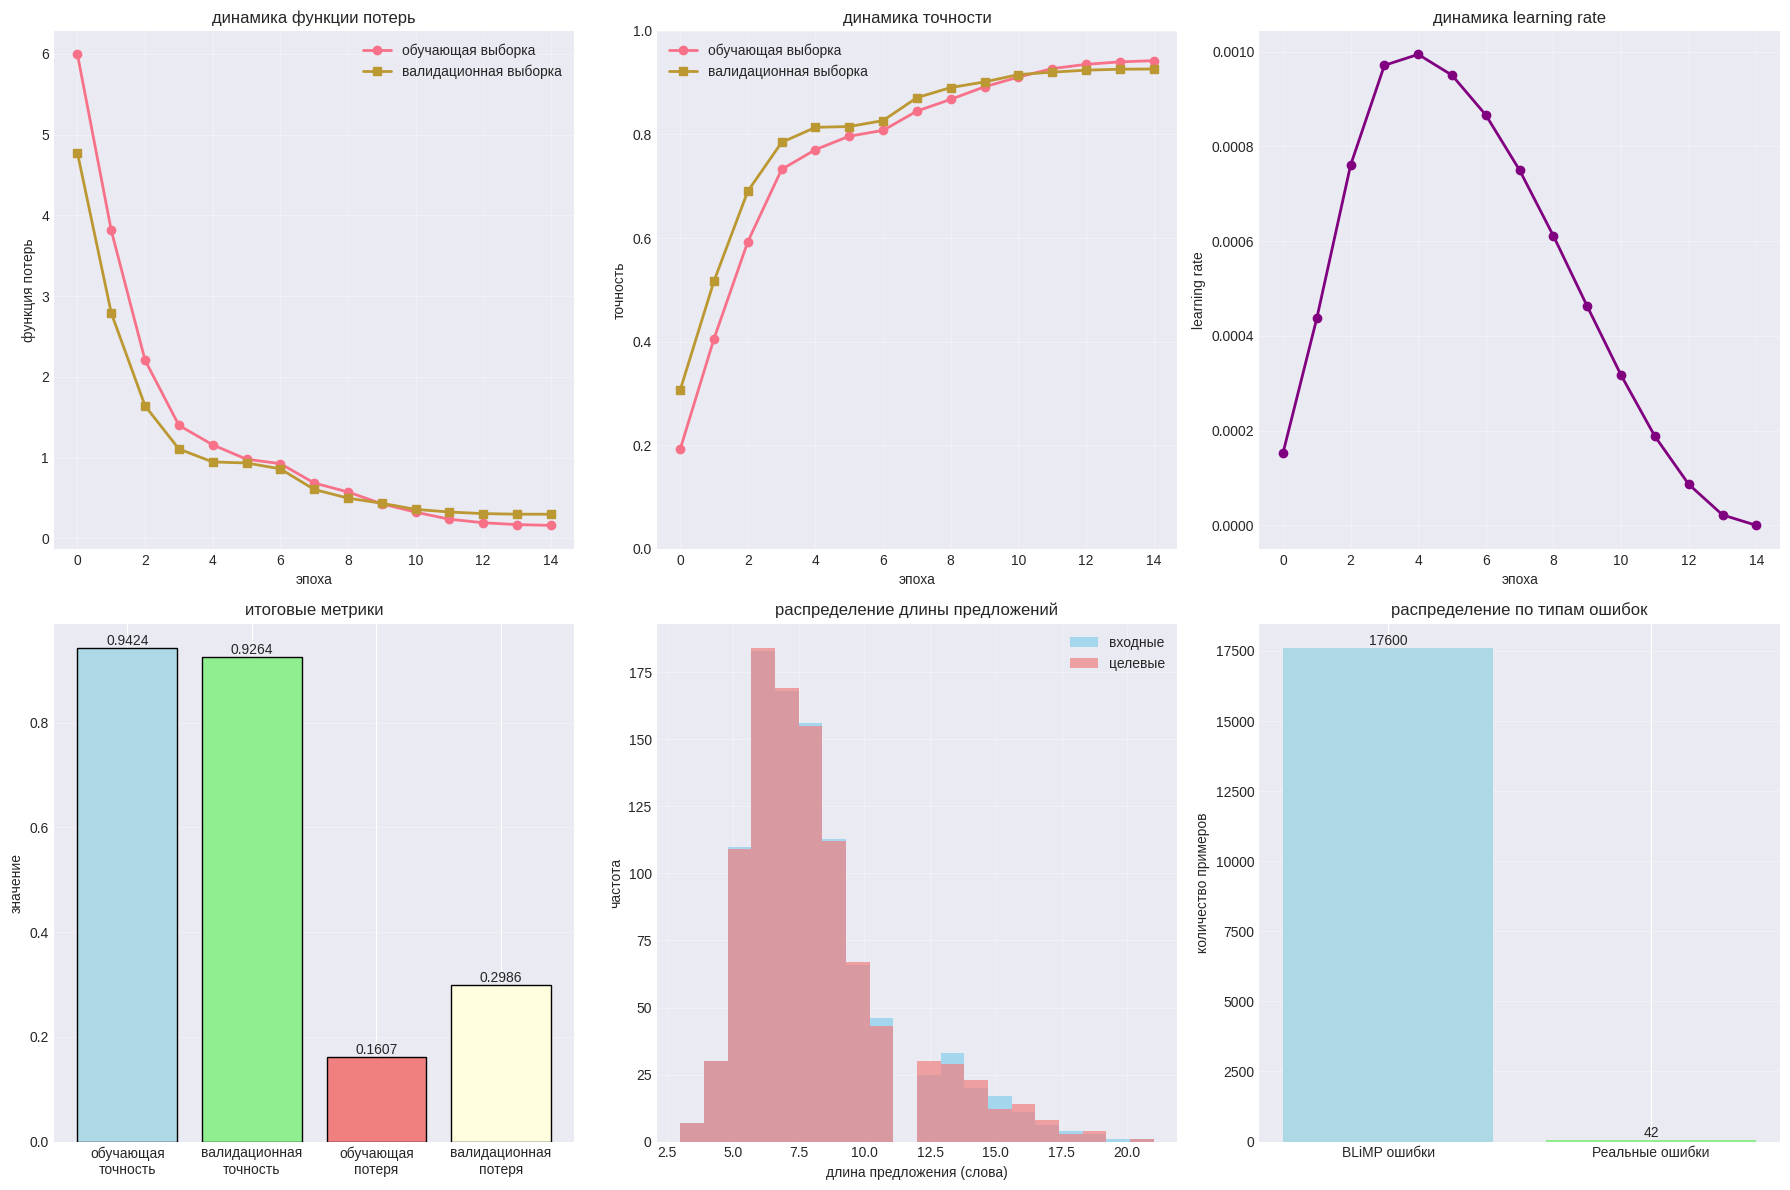


Сводная таблица результатов:
                          метрика   значение
    точность на обучающей выборке     0.9424
точность на валидационной выборке     0.9264
 финальная функция потерь (train)     0.1607
   финальная функция потерь (val)     0.2986
         количество эпох обучения         15
        размер модели (параметры) 13,896,810
                   размер словаря      3,690
    количество обучающих примеров     17,642

Результаты сохранены в seq2seq_results_summary.csv

 результаты исправления модели:
Было:  I study at University Witte
Стало: I at witte university

Было:  She works in Microsoft company
Стало: She works at microsoft

Было:  No teenager does tour at most nine restaurants.
Стало: No teenager does tour fewer than nine restaurants.

Было:  He drank a book
Стало: He read a book

Было:  She has car red
Стало: She has a car

 seq2seq модель обучена!
токенизатор сохранен в seq2seq_tokenizer.pkl


In [9]:
import re
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import pickle

manual_correction_examples = [
    ("I study at University Witte", "I study at Witte University"),
    ("She works in Microsoft company", "She works at Microsoft"),
    ("He lives in Moscow city", "He lives in Moscow"),
    ("They visited Harvard university", "They visited Harvard University"),
    ("She graduated from Oxford college", "She graduated from Oxford College"),
    ("We met at Central park", "We met at Central Park"),
    ("He works for Google company", "He works for Google"),
    ("She lives in New York city", "She lives in New York City"),
    ("They went to London bridge", "They went to London Bridge"),
    ("I study at Stanford university", "I study at Stanford University"),
    ("She teaches at Cambridge university", "She teaches at Cambridge University"),
    ("He applied to Yale university", "He applied to Yale University"),
    ("We walked through Hyde park", "We walked through Hyde Park"),
    ("She interned at Apple company", "She interned at Apple"),
    ("He resides in Paris city", "He resides in Paris"),
    ("I saw elephant in zoo", "I saw an elephant in the zoo"),
    ("She bought book yesterday", "She bought a book yesterday"),
    ("He plays piano well", "He plays the piano well"),
    ("They live in house near river", "They live in a house near the river"),
    ("She has cat and dog", "She has a cat and a dog"),
    ("She is good in math", "She is good at math"),
    ("He is afraid from spiders", "He is afraid of spiders"),
    ("We talked about the project on meeting", "We talked about the project at the meeting"),
    ("She arrived to the airport", "She arrived at the airport"),
    ("He is interested on history", "He is interested in history"),
    ("She has car red", "She has a red car"),
    ("He bought shoes expensive", "He bought expensive shoes"),
    ("They live in house big", "They live in a big house"),
    ("I need bag small", "I need a small bag"),
    ("She wore dress beautiful", "She wore a beautiful dress"),
    ("The team are winning", "The team is winning"),
    ("Each students has a book", "Each student has a book"),
    ("The data shows trends", "The data show trends"),
    ("My glasses is broken", "My glasses are broken"),
    ("The news are good", "The news is good"),
    ("He drank a book", "He read a book"),
    ("She ate a song", "She listened to a song"),
    ("They built a dream", "They pursued a dream"),
    ("I saw a silence", "I felt a silence"),
    ("He kicked the idea", "He rejected the idea"),
    ("Do a mistake", "Make a mistake"),
    ("Give an advice", "Give advice")
]

class Seq2SeqTokenizer:
    def __init__(self, vocab_size=20000):
        self.vocab_size = vocab_size
        self.word2idx = {}
        self.idx2word = {}
        self.special_tokens = {
            '[PAD]': 0,
            '[UNK]': 1,
            '[CLS]': 2,
            '[SEP]': 3,
            '[MASK]': 4
        }
    
    def build_vocab(self, sentences, min_freq=1):
        from collections import Counter
        word_freq = Counter()
        for sentence in sentences:
            words = self._preprocess(sentence).split()
            word_freq.update(words)
        
        filtered_words = {word: freq for word, freq in word_freq.items() if freq >= min_freq}
        most_common = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)
        most_common = most_common[:self.vocab_size - len(self.special_tokens)]
        
        self.word2idx = self.special_tokens.copy()
        start_idx = len(self.special_tokens)
        for i, (word, _) in enumerate(most_common):
            self.word2idx[word] = start_idx + i
        
        self.idx2word = {idx: word for word, idx in self.word2idx.items()}
    
    def _preprocess(self, text):
        text = text.lower().strip()
        text = ' '.join(text.split())
        return text
    
    def tokenize(self, text):
        text = self._preprocess(text)
        words = text.split()
        return ['[CLS]'] + words + ['[SEP]']
    
    def encode(self, text, max_length=64):
        tokens = self.tokenize(text)
        if len(tokens) > max_length:
            tokens = tokens[:max_length-1] + ['[SEP]']
        
        indices = []
        for token in tokens:
            if token in self.word2idx:
                indices.append(self.word2idx[token])
            else:
                indices.append(self.word2idx['[UNK]'])
        
        if len(indices) < max_length:
            pad_len = max_length - len(indices)
            indices = indices + [self.word2idx['[PAD]']] * pad_len
        
        attention_mask = [1 if idx != self.word2idx['[PAD]'] else 0 for idx in indices]
        
        return {
            'input_ids': torch.tensor(indices, dtype=torch.long),
            'attention_mask': torch.tensor(attention_mask, dtype=torch.long)
        }
    
    def get_vocab_size(self):
        return len(self.word2idx)

seq2seq_tokenizer = Seq2SeqTokenizer(vocab_size=20000)

all_sentences_for_vocab = []
all_sentences_for_vocab.extend(train_df['sentence_good'].tolist())
all_sentences_for_vocab.extend(train_df['sentence_bad'].tolist())
for bad, good in manual_correction_examples:
    all_sentences_for_vocab.append(bad)
    all_sentences_for_vocab.append(good)

seq2seq_tokenizer.build_vocab(all_sentences_for_vocab, min_freq=1)
seq2seq_vocab_size = seq2seq_tokenizer.get_vocab_size()
print(f" размер словаря seq2seq: {seq2seq_vocab_size}")

correction_data = []
for _, row in train_df.iterrows():
    correction_data.append({'input': row['sentence_bad'], 'target': row['sentence_good']})
for bad, good in manual_correction_examples:
    correction_data.append({'input': bad, 'target': good})

print(f" всего пар для обучения: {len(correction_data)}")

class Seq2SeqCorrectionDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=64):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        item = self.data[idx]
        src_enc = self.tokenizer.encode(item['input'], self.max_length)
        tgt_enc = self.tokenizer.encode(item['target'], self.max_length)
        return {
            'src_input_ids': src_enc['input_ids'],
            'src_attention_mask': src_enc['attention_mask'],
            'tgt_input_ids': tgt_enc['input_ids'][:-1],
            'tgt_labels': tgt_enc['input_ids'][1:],
            'tgt_attention_mask': tgt_enc['attention_mask'][:-1]
        }

# разделение на train/val
full_dataset = Seq2SeqCorrectionDataset(correction_data, seq2seq_tokenizer, max_length=64)
train_size = int(0.9 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_corr, val_corr = torch.utils.data.random_split(
    full_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42)
)

train_loader = DataLoader(train_corr, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_corr, batch_size=32, shuffle=False, num_workers=0)

class IndependentSeq2SeqModel(nn.Module):
    def __init__(self, vocab_size, d_model=256, nhead=8, num_layers=6, max_len=64):
        super().__init__()
        self.d_model = d_model
        
        # encoder
        self.encoder_embedding = nn.Embedding(vocab_size, d_model)
        self.encoder_pos = PositionalEncoding(d_model, max_len)
        self.encoder_dropout = nn.Dropout(0.1)
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=d_model * 4,
            dropout=0.1,
            activation='gelu',
            batch_first=True
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        # decoder
        self.decoder_embedding = nn.Embedding(vocab_size, d_model)
        self.decoder_pos = PositionalEncoding(d_model, max_len)
        self.decoder_dropout = nn.Dropout(0.1)
        
        decoder_layer = nn.TransformerDecoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=d_model * 4,
            dropout=0.1,
            activation='gelu',
            batch_first=True
        )
        self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        self.output_proj = nn.Linear(d_model, vocab_size)
        
        self._init_weights()
    
    def _init_weights(self):
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)
    
    def forward(self, src_input_ids, src_key_padding_mask, tgt_input_ids, tgt_key_padding_mask):
        # encoder
        src_emb = self.encoder_embedding(src_input_ids) * math.sqrt(self.d_model)
        src_emb = self.encoder_pos(src_emb)
        src_emb = self.encoder_dropout(src_emb)
        memory = self.encoder(src_emb, src_key_padding_mask=src_key_padding_mask)
        
        # decoder
        tgt_emb = self.decoder_embedding(tgt_input_ids) * math.sqrt(self.d_model)
        tgt_emb = self.decoder_pos(tgt_emb)
        tgt_emb = self.decoder_dropout(tgt_emb)
        
        tgt_len = tgt_input_ids.size(1)
        causal_mask = torch.triu(torch.ones(tgt_len, tgt_len), diagonal=1).bool()
        causal_mask = causal_mask.to(tgt_input_ids.device)
        
        output = self.decoder(
            tgt_emb, memory,
            tgt_mask=causal_mask,
            tgt_key_padding_mask=tgt_key_padding_mask,
            memory_key_padding_mask=src_key_padding_mask
        )
        return self.output_proj(output)

def compute_accuracy(logits, labels, ignore_index):
    # точность для seq2seq модели
    preds = logits.argmax(dim=-1)
    mask = labels != ignore_index
    correct = (preds == labels) & mask
    return correct.sum().float() / mask.sum().float()

def train_independent_seq2seq(model, train_loader, val_loader, device, epochs=15, lr=1e-3):
    model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=0.01)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer, max_lr=lr, epochs=epochs, steps_per_epoch=len(train_loader)
    )
    criterion = nn.CrossEntropyLoss(ignore_index=seq2seq_tokenizer.word2idx['[PAD]'])
    
    # история обучения
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': [],
        'lr': []
    }
    
    best_loss = float('inf')
    patience = 3
    patience_counter = 0
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        total_acc = 0
        num_batches = 0
        
        for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}'):
            src_ids = batch['src_input_ids'].to(device)
            src_mask = batch['src_attention_mask'].to(device)
            tgt_in = batch['tgt_input_ids'].to(device)
            tgt_labels = batch['tgt_labels'].to(device)
            tgt_mask = batch['tgt_attention_mask'].to(device)
            
            optimizer.zero_grad()
            # преобразование маски в булевы (True для padding)
            src_key_padding_mask = (src_mask == 0)
            tgt_key_padding_mask = (tgt_mask == 0)
            logits = model(src_ids, src_key_padding_mask, tgt_in, tgt_key_padding_mask)
            loss = criterion(logits.reshape(-1, logits.size(-1)), tgt_labels.reshape(-1))
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()
            
            # вычисление точности
            acc = compute_accuracy(logits, tgt_labels, seq2seq_tokenizer.word2idx['[PAD]'])
            
            total_loss += loss.item()
            total_acc += acc.item()
            num_batches += 1
        
        avg_train_loss = total_loss / num_batches
        avg_train_acc = total_acc / num_batches
        
        # валидация
        model.eval()
        val_loss = 0
        val_acc = 0
        val_batches = 0
        with torch.no_grad():
            for batch in val_loader:
                src_ids = batch['src_input_ids'].to(device)
                src_mask = batch['src_attention_mask'].to(device)
                tgt_in = batch['tgt_input_ids'].to(device)
                tgt_labels = batch['tgt_labels'].to(device)
                tgt_mask = batch['tgt_attention_mask'].to(device)
                
                # булевые маски
                src_key_padding_mask = (src_mask == 0)
                tgt_key_padding_mask = (tgt_mask == 0)
                logits = model(src_ids, src_key_padding_mask, tgt_in, tgt_key_padding_mask)
                loss = criterion(logits.reshape(-1, logits.size(-1)), tgt_labels.reshape(-1))
                acc = compute_accuracy(logits, tgt_labels, seq2seq_tokenizer.word2idx['[PAD]'])
                
                val_loss += loss.item()
                val_acc += acc.item()
                val_batches += 1
        
        avg_val_loss = val_loss / val_batches
        avg_val_acc = val_acc / val_batches
        
        # сохранение истории
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['train_acc'].append(avg_train_acc)
        history['val_acc'].append(avg_val_acc)
        history['lr'].append(optimizer.param_groups[0]['lr'])
        
        print(f"Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}")
        print(f"Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.4f}")
        
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'independent_seq2seq_corrector.pth')
            print(" сохранена лучшая модель! independent_seq2seq_corrector.pth")
        else:
            patience_counter += 1
            print(f"Потери не улучшились. Patience: {patience_counter}/{patience}")
        
        if patience_counter >= patience:
            print(f" ранняя остановка на эпохе {epoch+1}")
            break
    
    return model, history

def plot_training_history(history):
    # графики обучения
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # loss
    axes[0, 0].plot(history['train_loss'], label='обучающая выборка', marker='o', linewidth=2)
    axes[0, 0].plot(history['val_loss'], label='валидационная выборка', marker='s', linewidth=2)
    axes[0, 0].set_xlabel('эпоха')
    axes[0, 0].set_ylabel('функция потерь')
    axes[0, 0].set_title('динамика функции потерь')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # accuracy
    axes[0, 1].plot(history['train_acc'], label='обучающая выборка', marker='o', linewidth=2)
    axes[0, 1].plot(history['val_acc'], label='валидационная выборка', marker='s', linewidth=2)
    axes[0, 1].set_xlabel('эпоха')
    axes[0, 1].set_ylabel('точность')
    axes[0, 1].set_title('динамика точности')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim([0.0, 1.0])
    
    # learning Rate
    axes[0, 2].plot(history['lr'], marker='o', color='purple', linewidth=2)
    axes[0, 2].set_xlabel('эпоха')
    axes[0, 2].set_ylabel('learning rate')
    axes[0, 2].set_title('динамика learning rate')
    axes[0, 2].grid(True, alpha=0.3)
    
    # final metrics comparison
    metrics = ['обучающая\nточность', 'валидационная\nточность', 'обучающая\nпотеря', 'валидационная\nпотеря']
    values = [history['train_acc'][-1], history['val_acc'][-1], 
              history['train_loss'][-1], history['val_loss'][-1]]
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    bars = axes[1, 0].bar(range(len(metrics)), values, color=colors, edgecolor='black')
    axes[1, 0].set_xticks(range(len(metrics)))
    axes[1, 0].set_xticklabels(metrics)
    axes[1, 0].set_ylabel('значение')
    axes[1, 0].set_title('итоговые метрики')
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{value:.4f}', ha='center', va='bottom')
    
    # распределение длины предложений
    input_lengths = []
    target_lengths = []
    for data in correction_data[:1000]:  # берем подвыборку для скорости
        input_lengths.append(len(data['input'].split()))
        target_lengths.append(len(data['target'].split()))
    
    axes[1, 1].hist(input_lengths, bins=20, alpha=0.7, label='входные', color='skyblue')
    axes[1, 1].hist(target_lengths, bins=20, alpha=0.7, label='целевые', color='lightcoral')
    axes[1, 1].set_xlabel('длина предложения (слова)')
    axes[1, 1].set_ylabel('частота')
    axes[1, 1].set_title('распределение длины предложений')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # статистика по категориям
    blimp_count = sum(1 for data in correction_data if data['input'] in train_df['sentence_bad'].values)
    real_count = len(manual_correction_examples)
    categories = ['BLiMP ошибки', 'Реальные ошибки']
    counts = [blimp_count, real_count]
    bars2 = axes[1, 2].bar(categories, counts, color=['lightblue', 'lightgreen'])
    axes[1, 2].set_ylabel('количество примеров')
    axes[1, 2].set_title('распределение по типам ошибок')
    axes[1, 2].grid(True, alpha=0.3, axis='y')
    
    for bar, count in zip(bars2, counts):
        height = bar.get_height()
        axes[1, 2].text(bar.get_x() + bar.get_width()/2., height,
                       str(count), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('seq2seq_training_results_comprehensive.png', dpi=150, bbox_inches='tight')
    plt.show()

def create_summary_table(history, vocab_size, model_params):
    """ сводная таблицу результатов"""
    summary_data = {
        'метрика': [
            'точность на обучающей выборке',
            'точность на валидационной выборке', 
            'финальная функция потерь (train)',
            'финальная функция потерь (val)',
            'количество эпох обучения',
            'размер модели (параметры)',
            'размер словаря',
            'количество обучающих примеров'
        ],
        'значение': [
            f"{history['train_acc'][-1]:.4f}",
            f"{history['val_acc'][-1]:.4f}",
            f"{history['train_loss'][-1]:.4f}",
            f"{history['val_loss'][-1]:.4f}",
            f"{len(history['train_acc'])}",
            f"{model_params:,}",
            f"{vocab_size:,}",
            f"{len(correction_data):,}"
        ]
    }
    
    summary_df = pd.DataFrame(summary_data)
    print("\nСводная таблица результатов:")
    print(summary_df.to_string(index=False))
    summary_df.to_csv('seq2seq_results_summary.csv', index=False)
    print("\nРезультаты сохранены в seq2seq_results_summary.csv")

def correct_with_independent_model(model, tokenizer, sentence, device, max_len=64):
    model.eval()
    with torch.no_grad():
        src_enc = tokenizer.encode(sentence, max_len)
        src_ids = src_enc['input_ids'].unsqueeze(0).to(device)
        src_mask = src_enc['attention_mask'].unsqueeze(0).to(device)
        
        # булевая маска для encoder
        src_key_padding_mask = (src_mask == 0)
        
        generated = [tokenizer.word2idx['[CLS]']]
        repeated_count = 0
        last_token = None
        
        for _ in range(max_len - 1):
            tgt_tensor = torch.tensor([generated], dtype=torch.long).to(device)
            # для decoder маска без padding (все True)
            tgt_key_padding_mask = torch.zeros(len(generated), dtype=torch.bool).to(device)
            
            logits = model(src_ids, src_key_padding_mask, tgt_tensor, tgt_key_padding_mask)
            next_token = logits[0, -1].argmax().item()
            
            # предотвращение повторений
            if next_token == last_token:
                repeated_count += 1
                if repeated_count > 3:
                    break
            else:
                repeated_count = 0
                last_token = next_token
            
            generated.append(next_token)
            
            if next_token == tokenizer.word2idx['[SEP]']:
                break
        
        tokens = [tokenizer.idx2word.get(idx, '[UNK]') for idx in generated[1:-1]]
        result = ' '.join(tokens)
        
        # восстановление регистра
        if sentence and sentence[0].isupper():
            result = result.capitalize()
        
        return result

def postprocess_result(text):
    text = re.sub(r'\b(university|college|park|bridge|city)\s+([A-Z][a-z]+)', r'\2 \1', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(in|at)\s+([A-Z][a-zA-Z]*)\s+company\b', r'at \2', text, flags=re.IGNORECASE)
    return text

print("\n запуск обучения seq2seq модели")
independent_seq2seq_model = IndependentSeq2SeqModel(seq2seq_vocab_size, d_model=256, num_layers=6)
trained_independent_model, training_history = train_independent_seq2seq(independent_seq2seq_model, train_loader, val_loader, device, epochs=15, lr=1e-3)

# создание графиков
plot_training_history(training_history)

# сводная таблица
total_params = sum(p.numel() for p in trained_independent_model.parameters())
create_summary_table(training_history, seq2seq_vocab_size, total_params)

# ТЕСТИРОВАНИЕ
test_inputs = [
    "I study at University Witte",
    "She works in Microsoft company",
    "No teenager does tour at most nine restaurants.",
    "He drank a book",
    "She has car red"
]

print("\n результаты исправления модели:")
for sent in test_inputs:
    raw = correct_with_independent_model(trained_independent_model, seq2seq_tokenizer, sent, device)
    final = postprocess_result(raw)
    print(f"Было:  {sent}")
    print(f"Стало: {final}\n")

print(" seq2seq модель обучена!")

with open('seq2seq_tokenizer.pkl', 'wb') as f:
    pickle.dump(seq2seq_tokenizer, f)

print("токенизатор сохранен в seq2seq_tokenizer.pkl")

In [10]:
from torchinfo import summary

model = IndependentSeq2SeqModel(
    vocab_size=3690,  
    d_model=256,
    num_layers=6
)

summary(model)

Layer (type:depth-idx)                                            Param #
IndependentSeq2SeqModel                                           --
├─Embedding: 1-1                                                  944,640
├─PositionalEncoding: 1-2                                         --
├─Dropout: 1-3                                                    --
├─TransformerEncoder: 1-4                                         --
│    └─ModuleList: 2-1                                            --
│    │    └─TransformerEncoderLayer: 3-1                          789,760
│    │    └─TransformerEncoderLayer: 3-2                          789,760
│    │    └─TransformerEncoderLayer: 3-3                          789,760
│    │    └─TransformerEncoderLayer: 3-4                          789,760
│    │    └─TransformerEncoderLayer: 3-5                          789,760
│    │    └─TransformerEncoderLayer: 3-6                          789,760
├─Embedding: 1-5                                               